TensolFlowを用いた深層学習

base     
constant

In [1]:
# バージョン指定
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)
print(type(a))


a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [3]:
sess = tf.Session()

# sess.run() : 計算の実行
# 計算グラフの作成　→ 計算の実行
print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


placeholder

In [4]:
# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None, 3])

print('x:', x)

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)


In [5]:
sess = tf.Session()

X = np.random.rand(2, 3)
print('X:', X)

# プレースホルダーにX[0]を入力
# shapeを(3,)から(1,3)にするためにreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1, -1)}))
# プレースホルダーにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,- 1)}))

X: [[0.12214789 0.52701919 0.45649734]
 [0.21580716 0.85326598 0.64521866]]
x: [[0.1221479  0.5270192  0.45649734]]
x: [[0.21580715 0.853266   0.6452187 ]]


variables

In [6]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

a: Tensor("Const_3:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>


In [9]:
calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

1
10
100


線形回帰

In [10]:
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2

# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象となる変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数（平均二乗誤差）
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1, 1)
d_train = d.reshape(-1, 1)

# train
for i in range(iters_num):
  sess.run(train, feed_dict={xt:x_train, dt:d_train})
  loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train})
  W_val = sess.run(W)
  b_val = sess.run(b)
  print('Generation : ' + str(i+1) + '.誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

Generation : 1.誤差 = 7.424892
Generation : 2.誤差 = 4.2956758
Generation : 3.誤差 = 2.5360656
Generation : 4.誤差 = 1.545786
Generation : 5.誤差 = 0.98767275
Generation : 6.誤差 = 0.6723447
Generation : 7.誤差 = 0.49342954
Generation : 8.誤差 = 0.39117858
Generation : 9.誤差 = 0.3320309
Generation : 10.誤差 = 0.29713494
Generation : 11.誤差 = 0.27590108
Generation : 12.誤差 = 0.26238048
Generation : 13.誤差 = 0.25323066
Generation : 14.誤差 = 0.24657337
Generation : 15.誤差 = 0.24135274
Generation : 16.誤差 = 0.23697478
Generation : 17.誤差 = 0.23310505
Generation : 18.誤差 = 0.22955474
Generation : 19.誤差 = 0.22621712
Generation : 20.誤差 = 0.2230314
Generation : 21.誤差 = 0.21996255
Generation : 22.誤差 = 0.21699028
Generation : 23.誤差 = 0.2141024
Generation : 24.誤差 = 0.21129127
Generation : 25.誤差 = 0.20855197
Generation : 26.誤差 = 0.20588098
Generation : 27.誤差 = 0.20327573
Generation : 28.誤差 = 0.20073402
Generation : 29.誤差 = 0.19825405
Generation : 30.誤差 = 0.19583414
Generation : 31.誤差 = 0.19347274
Generation : 32.誤差 = 0.1911

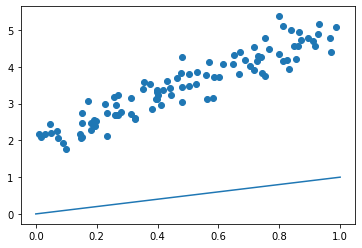

In [11]:
# 予測関数
def predict(x):
  return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex, linex)
plt.show()

非線形回帰

In [12]:
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n = 100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d = - 0.4 * x ** 3 + 1.6 * x ** 2 -2.8 * x + 1

# ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n)

# モデル
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt, W)

# 誤差関数（平均二乗誤差）
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = np.zeros([n, 4])
d_train = d.reshape(-1, 1)
for i in range(n):
  for j in range(4):
    x_train[i, j] = x[i] ** j


# train
for i in range(iters_num):
  if (i+1) % plot_interval == 0:
    loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train})
    W_val = sess.run(W)
    print('Generation : ' + str(i+1) + '.誤差 = ' + str(loss_val))
  sess.run(train, feed_dict={xt:x_train, dt:d_train})

print(W_val[::-1])

Generation : 100.誤差 = 21.754108
Generation : 200.誤差 = 18.324644
Generation : 300.誤差 = 15.341653
Generation : 400.誤差 = 12.764691
Generation : 500.誤差 = 10.554823
Generation : 600.誤差 = 8.674638
Generation : 700.誤差 = 7.0883317
Generation : 800.誤差 = 5.7618036
Generation : 900.誤差 = 4.6628113
Generation : 1000.誤差 = 3.7611086
Generation : 1100.誤差 = 3.028618
Generation : 1200.誤差 = 2.4395876
Generation : 1300.誤差 = 1.9707075
Generation : 1400.誤差 = 1.6011887
Generation : 1500.誤差 = 1.3127819
Generation : 1600.誤差 = 1.0897273
Generation : 1700.誤差 = 0.91863054
Generation : 1800.誤差 = 0.78830576
Generation : 1900.誤差 = 0.68953866
Generation : 2000.誤差 = 0.6148582
Generation : 2100.誤差 = 0.5582923
Generation : 2200.誤差 = 0.51513374
Generation : 2300.誤差 = 0.48172283
Generation : 2400.誤差 = 0.45526025
Generation : 2500.誤差 = 0.43363988
Generation : 2600.誤差 = 0.41530803
Generation : 2700.誤差 = 0.39914554
Generation : 2800.誤差 = 0.38436577
Generation : 2900.誤差 = 0.3704342
Generation : 3000.誤差 = 0.3570005
Generation 

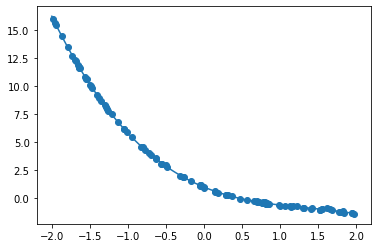

In [15]:
# 予測関数
def predict(x):
  result = 0.
  for i in range(0, 4):
    result += W_val[i, 0] * x ** i
  return result

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x ,d)
linex = np.linspace(-2, 2, 100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

分類1層(mnist)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[False False False ... False False  True]
Generation: 1. 正解率 = 0.2897
[ True False  True ... False False  True]
Generation: 2. 正解率 = 0.4526
[ True  True  True ... False False False]
Generation: 3. 正解率 = 0.5035
[ True False  True ... False False False]
Generation: 4. 正解率 = 0.5492
[ True False  True ... False False  True]
Generation: 5. 正解率 = 0.6256
[ True False  True ... False False  True]
Generation: 6. 正解率 = 0.6924
[ True  True  True ... False False  True]
Generation: 7. 正解率 = 0.6968
[ True  True  True ... False False  True]
Generation: 8. 正解率 = 0.7171
[ True  True  True ... False False  True]
Generation: 9. 正解率 = 0.7139
[ True  True  True ... False False  True]
Generation: 10. 正解率 = 0.712
[ True  True  True ...  True False  True]
Generation: 11. 正解率 = 0.726
[ True  True  True ...  True False  

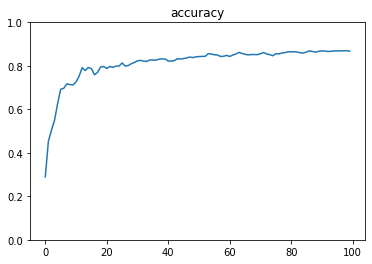

In [17]:
from tensorflow.examples.tutorials.mnist import input_data

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

# 入力値、パラメータの設定
x = tf.placeholder(tf.float32, shape=[None, 784])  # 入力層の次元
d = tf.placeholder(tf.float32, shape=[None, 10])  # 出力層の次元
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
  x_batch, d_batch = mnist.train.next_batch(batch_size)
  sess.run(train, feed_dict={x: x_batch, d: d_batch})
  if (i+1) % plot_interval == 0:
    print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
    accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
    accuracies.append(accuracy_val)
    print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title('accuracy')
plt.ylim(0, 1.0)
plt.show()

分類3層(mnistデータセット)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1136
Generation: 200. 正解率 = 0.3021
Generation: 300. 正解率 = 0.4309
Generation: 400. 正解率 = 0.5076
Generation: 500. 正解率 = 0.5735
Generation: 600. 正解率 = 0.6481
Generation: 700. 正解率 = 0.6935
Generation: 800. 正解率 = 0.7227
Generation: 900. 正解率 = 0.7453
Generation: 1000. 正解率 = 0.7678
Generation: 1100. 正解率 = 0.7909
Generation: 1200. 正解率 = 0.8114
Generation: 1300. 正解率 = 0.8235
Generation: 1400. 正解率 = 0.8372
Generation: 1500. 正解率 = 0.8465
Generation: 1600. 正解率 = 0.8538
Generation: 1700. 正解率 = 0.8593
Generation: 1800. 正解率 = 0.8681
Generation: 1900. 正解率 = 0.8721
Generation: 2000. 正解率 = 0.8779
Generation: 2100. 正解率 = 0.8821
Generation: 2200. 正解率 = 0.8836
Generation: 2300. 正解率 = 0.887
Generation: 2400. 正解率 = 0.8905
Generation: 2500. 正解率 = 0.8941
Generation: 2600. 正解率 = 0.8967
Generation

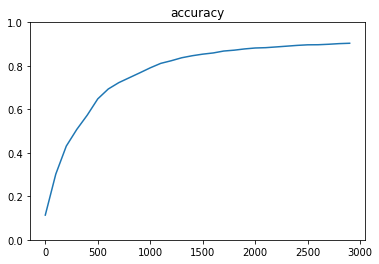

In [20]:
# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

# 入力値、パラメータの設定
x = tf.placeholder(tf.float32, shape=[None, 784])  # 入力層の次元
d = tf.placeholder(tf.float32, shape=[None, 10])  # 出力層の次元
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

# 中間層出力
z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

# ドロップアウト
keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

# 出力層
y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))

optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
  x_batch, d_batch = mnist.train.next_batch(batch_size)
  sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob:(1 - dropout_rate)})
  if (i+1) % plot_interval == 0:
    accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels, keep_prob:1.0})
    accuracies.append(accuracy_val)
    print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title('accuracy')
plt.ylim(0, 1.0)
plt.show()

分類CNN(mnist)     
conv - relu - pool - conv - relu - pool - affin - relu - dropout - affin -softmax

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.2925
Generation: 20. 正解率 = 0.5914
Generation: 30. 正解率 = 0.6827
Generation: 40. 正解率 = 0.7279
Generation: 50. 正解率 = 0.8
Generation: 60. 正解率 = 0.826
Generation: 70. 正解率 = 0.8529
Generation: 80. 正解率 = 0.8726
Generation: 90. 正解率 = 0.884
Generation: 100. 正解率 = 0.8942
Generation: 110. 正解率 = 0.9031
Generation: 120. 正解率 = 0.9036
Generation: 130. 正解率 = 0.9055
Generation: 140. 正解率 = 0.9178
Generation: 150. 正解率 = 0.9186
Generation: 160. 正解率 = 0.9216
Generation: 170. 正解率 = 0.9234
Generation: 180. 正解率 = 0.9225
Generation: 190. 正解率 = 0.928
Generation: 200. 正解率 = 0.9272
Generation: 210. 正解率 = 0.9317
Generation: 220. 正解率 = 0.936
Generation: 230. 正解率 = 0.9356
Generation: 240. 正解率 = 0.9384
Generation: 250. 正解率 = 0.9379
Generation: 260. 正解率 = 0.9384
Generation: 270. 正解率 = 0.9427
Generation: 

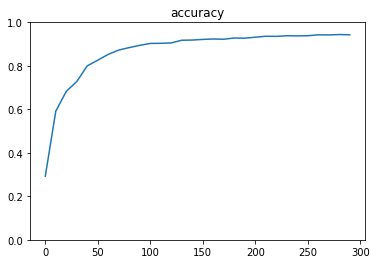

In [22]:
# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# 入力値、パラメータの設定
x = tf.placeholder(tf.float32, shape=[None, 784])  # 入力層の次元
d = tf.placeholder(tf.float32, shape=[None, 10])  # 出力層の次元

# 画像を784の一次元から28×28の二次元に変換
x_image = tf.reshape(x, [-1, 28, 28, 1])

# 第一層のW, b
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層の convolutional層とpooling層
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズをn*nにしたい場合はksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# affin - relu層
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# ドロップアウト層
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# affin -softmax層
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー誤差
loss = -tf.reduce_sum(d * tf.log(y_conv))
optimizer = tf.train.AdamOptimizer(1e-4)
train = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y_conv, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
  x_batch, d_batch = mnist.train.next_batch(batch_size)
  sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob:(1 - dropout_rate)})
  if (i+1) % plot_interval == 0:
    accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels, keep_prob:1.0})
    accuracies.append(accuracy_val)
    print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title('accuracy')
plt.ylim(0, 1.0)
plt.show()